In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Start writing code here...
df = pd.read_csv('jane_st.csv')
df.shape


(100000, 138)

In [ ]:
df = df.dropna()


<AxesSubplot:>

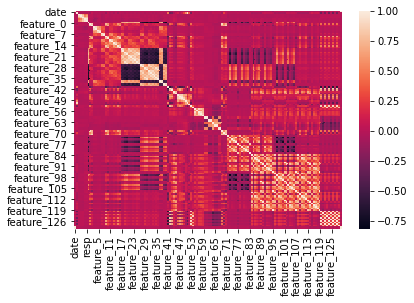

In [ ]:
sns.heatmap(df.corr())

In [ ]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                #print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)
    print('Removed Columns {}'.format(drops))
    return x

In [ ]:
X = pd.concat([remove_collinear_features(df, 0.9), df['weight'], df['ts_id']], axis = 1)

y = pd.Series([1 if x > 0 else 0 for x in df['resp']])

Removed Columns {'feature_34', 'feature_126', 'feature_51', 'feature_124', 'feature_129', 'feature_35', 'feature_66', 'feature_76', 'feature_33', 'feature_114', 'feature_61', 'feature_4', 'feature_68', 'resp', 'feature_26', 'feature_119', 'feature_110', 'feature_57', 'feature_25', 'feature_128', 'feature_63', 'feature_36', 'feature_122', 'feature_107', 'feature_113', 'feature_127', 'feature_125', 'feature_23', 'feature_69', 'feature_108', 'feature_101', 'feature_48', 'feature_38', 'feature_58', 'feature_116', 'ts_id'}


In [ ]:
tscv = TimeSeriesSplit(n_splits=32)
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

TRAIN: [   0    1    2 ... 2558 2559 2560] TEST: [2561 2562 2563 ... 5118 5119 5120]
TRAIN: [   0    1    2 ... 5118 5119 5120] TEST: [5121 5122 5123 ... 7678 7679 7680]
TRAIN: [   0    1    2 ... 7678 7679 7680] TEST: [ 7681  7682  7683 ... 10238 10239 10240]
TRAIN: [    0     1     2 ... 10238 10239 10240] TEST: [10241 10242 10243 ... 12798 12799 12800]
TRAIN: [    0     1     2 ... 12798 12799 12800] TEST: [12801 12802 12803 ... 15358 15359 15360]
TRAIN: [    0     1     2 ... 15358 15359 15360] TEST: [15361 15362 15363 ... 17918 17919 17920]
TRAIN: [    0     1     2 ... 17918 17919 17920] TEST: [17921 17922 17923 ... 20478 20479 20480]
TRAIN: [    0     1     2 ... 20478 20479 20480] TEST: [20481 20482 20483 ... 23038 23039 23040]
TRAIN: [    0     1     2 ... 23038 23039 23040] TEST: [23041 23042 23043 ... 25598 25599 25600]
TRAIN: [    0     1     2 ... 25598 25599 25600] TEST: [25601 25602 25603 ... 28158 28159 28160]
TRAIN: [    0     1     2 ... 28158 28159 28160] TEST: [2816

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=493c38cf-6a88-4424-8f73-ba5136a7ea38' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>